Step 1 : Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report


Step 2 : Load Train & Test Datasets with Proper Column Names

In [3]:
columns = [
    'duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot',
    'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations',
    'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count',
    'serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate',
    'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate',
    'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','label','difficulty_level'
]

train_df = pd.read_csv(r"C:\Users\lenovo\Desktop\SentinelNet\Datasets\nsl-kdd\KDDTrain+.txt", header=None, names=columns)
test_df  = pd.read_csv(r"C:\Users\lenovo\Desktop\SentinelNet\Datasets\nsl-kdd\KDDTest+.txt", header=None, names=columns)


print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
train_df.head()


Train shape: (125973, 43)
Test shape: (22544, 43)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


Step 3: Data Cleaning
Drop missing values

train_df.dropna(inplace=True)
test_df.dropna(inplace=True)

Remove duplicates

In [4]:
train_df.drop_duplicates(inplace=True)
test_df.drop_duplicates(inplace=True)

Create binary target (0 = normal, 1 = attack)

In [5]:
train_df['attack_binary'] = train_df['label'].apply(lambda x: 0 if x == 'normal' else 1)
test_df['attack_binary']  = test_df['label'].apply(lambda x: 0 if x == 'normal' else 1)

Step 4: Exploratory Data Analysis (EDA)

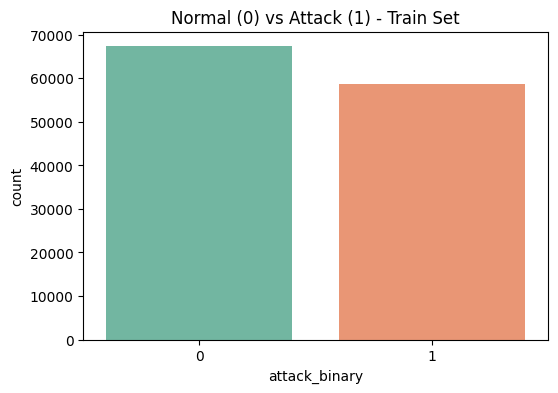

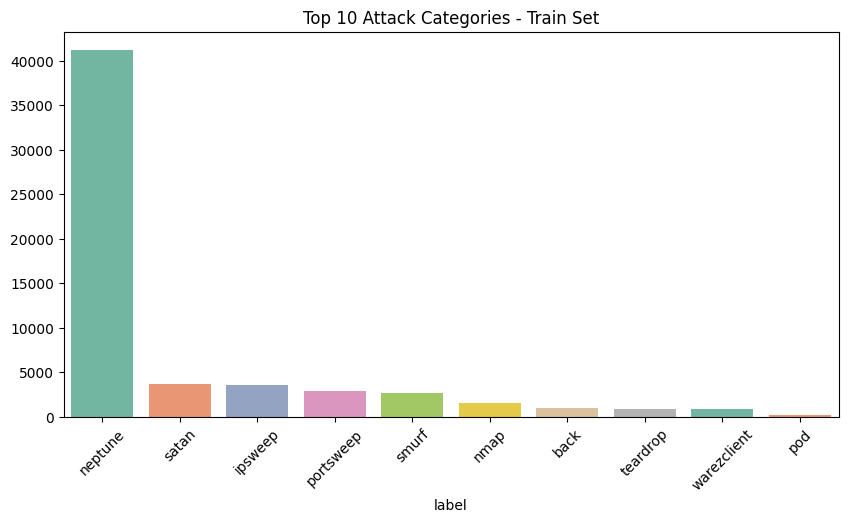

In [6]:
# Normal vs Attack distribution (Train set)
plt.figure(figsize=(6,4))
sns.countplot(x='attack_binary', data=train_df, hue='attack_binary', palette="Set2", legend=False)
plt.title("Normal (0) vs Attack (1) - Train Set")
plt.show()

# Top 10 attack categories
attack_counts = train_df[train_df['label'] != 'normal']['label'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=attack_counts.index, y=attack_counts.values, hue=attack_counts.index, palette="Set2", legend=False)
plt.title("Top 10 Attack Categories - Train Set")
plt.xticks(rotation=45)
plt.show()



In [ ]:
Step 5: One-Hot Encoding of Categorical Columns

In [7]:
categorical_cols = ['protocol_type', 'service', 'flag']

train_df = pd.get_dummies(train_df, columns=categorical_cols)
test_df  = pd.get_dummies(test_df, columns=categorical_cols)

# Align train and test to have the same columns
train_df, test_df = train_df.align(test_df, join='inner', axis=1)

print("Train shape after encoding:", train_df.shape)
print("Test shape after encoding:", test_df.shape)


Train shape after encoding: (125973, 119)
Test shape after encoding: (22544, 119)


In [ ]:
Step 6: Feature Scaling (MinMaxScaler)

In [8]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(train_df.drop(['label','attack_binary','difficulty_level'], axis=1))
y_train = train_df['attack_binary']

X_test = scaler.transform(test_df.drop(['label','attack_binary','difficulty_level'], axis=1))
y_test = test_df['attack_binary']


In [ ]:
Step 7: Train Models and Evaluate

In [9]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n🔹 {name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))



🔹 Logistic Regression Accuracy: 0.7540
              precision    recall  f1-score   support

           0       0.65      0.93      0.76      9711
           1       0.92      0.62      0.74     12833

    accuracy                           0.75     22544
   macro avg       0.78      0.77      0.75     22544
weighted avg       0.80      0.75      0.75     22544


🔹 Decision Tree Accuracy: 0.8144
              precision    recall  f1-score   support

           0       0.71      0.97      0.82      9711
           1       0.97      0.70      0.81     12833

    accuracy                           0.81     22544
   macro avg       0.84      0.83      0.81     22544
weighted avg       0.85      0.81      0.81     22544


🔹 Random Forest Accuracy: 0.7707
              precision    recall  f1-score   support

           0       0.66      0.97      0.79      9711
           1       0.97      0.62      0.75     12833

    accuracy                           0.77     22544
   macro avg       0

In [ ]:
Step 8: Compare Model Accuracies

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9572\2144298724.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette="Set2")


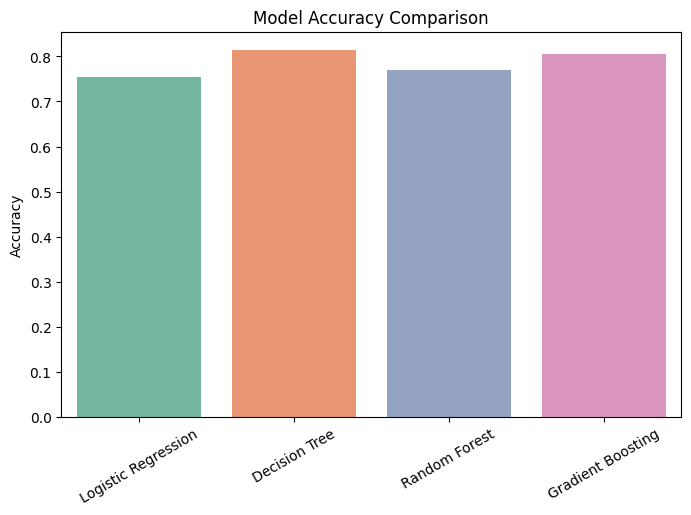

In [12]:
plt.figure(figsize=(8,5))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="Set2")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=30)
plt.show()


Sanity checks

In [13]:
print("X_test shape:", getattr(X_test, "shape", None))
print("y_test shape:", getattr(y_test, "shape", None))
print("Unique y_test values:", np.unique(y_test))
print("Models:", list(models.keys()))

# If y_test is not binary (0/1), create it from your 'label' column:
# y_train = (train_df['label'] != 'normal').astype(int)
# y_test  = (test_df['label']  != 'normal').astype(int)


X_test shape: (22544, 116)
y_test shape: (22544,)
Unique y_test values: [0 1]
Models: ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']


Confusion Matrix

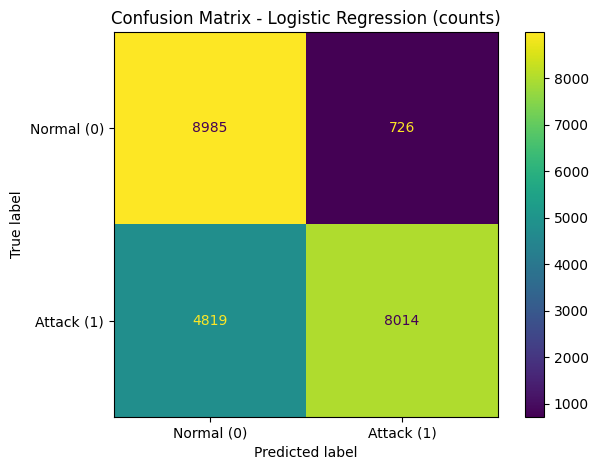

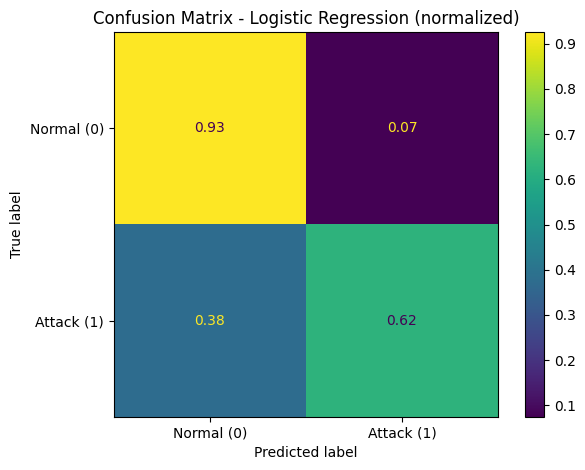

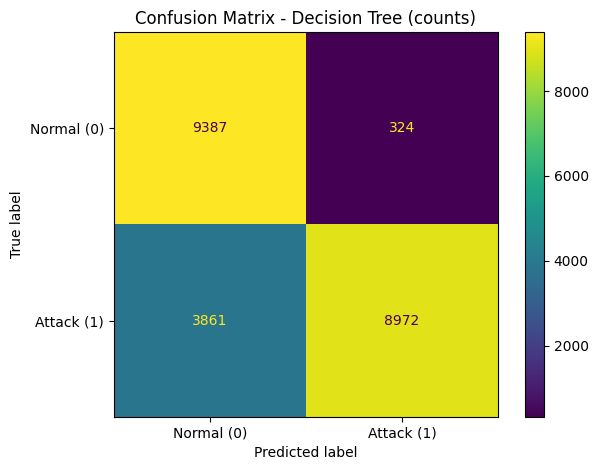

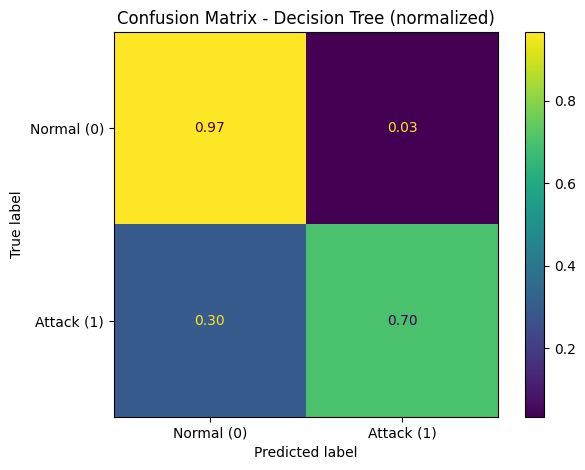

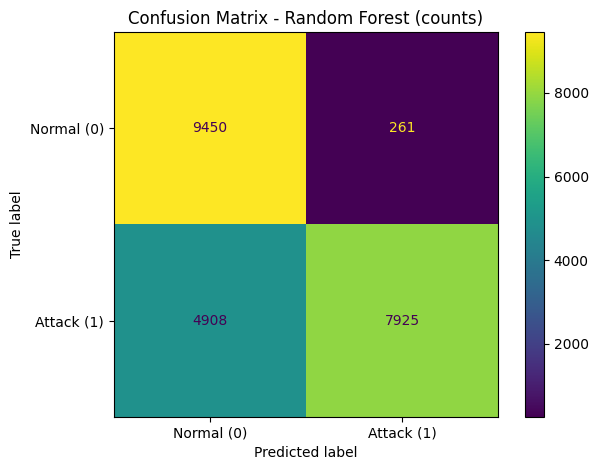

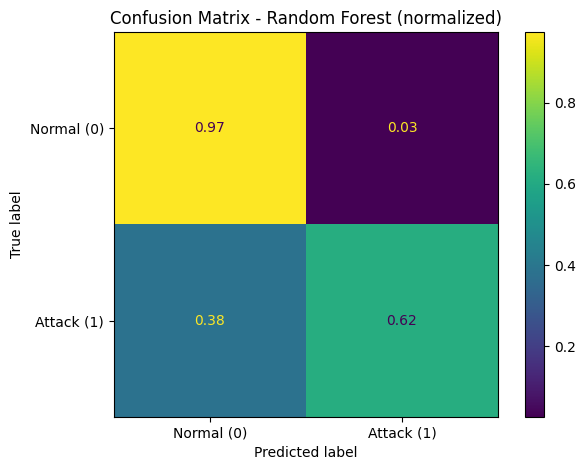

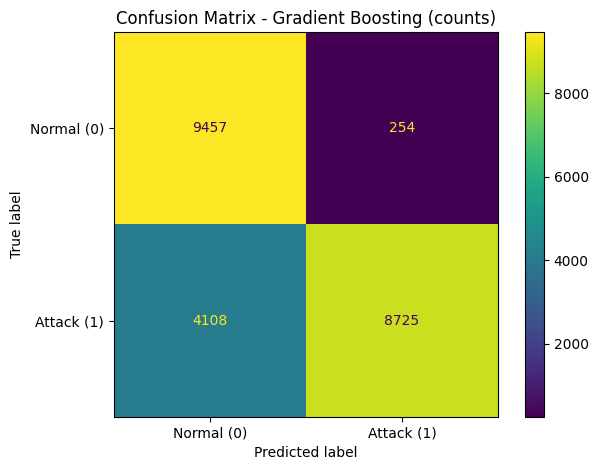

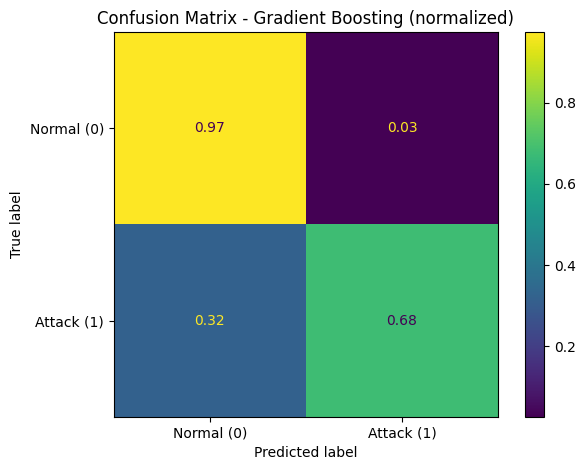

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

for name, model in models.items():
    y_pred = model.predict(X_test)
    # raw counts
    cm_counts = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_counts,
                                  display_labels=["Normal (0)", "Attack (1)"])
    disp.plot(values_format='d')       # integer counts
    plt.title(f"Confusion Matrix - {name} (counts)")
    plt.tight_layout()
    plt.show()

    # normalized (by true label => recall per class)
    cm_norm = confusion_matrix(y_test, y_pred, normalize='true')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_norm,
                                  display_labels=["Normal (0)", "Attack (1)"])
    disp.plot(values_format='.2f')
    plt.title(f"Confusion Matrix - {name} (normalized)")
    plt.tight_layout()
    plt.show()


ROC-AUC Curve

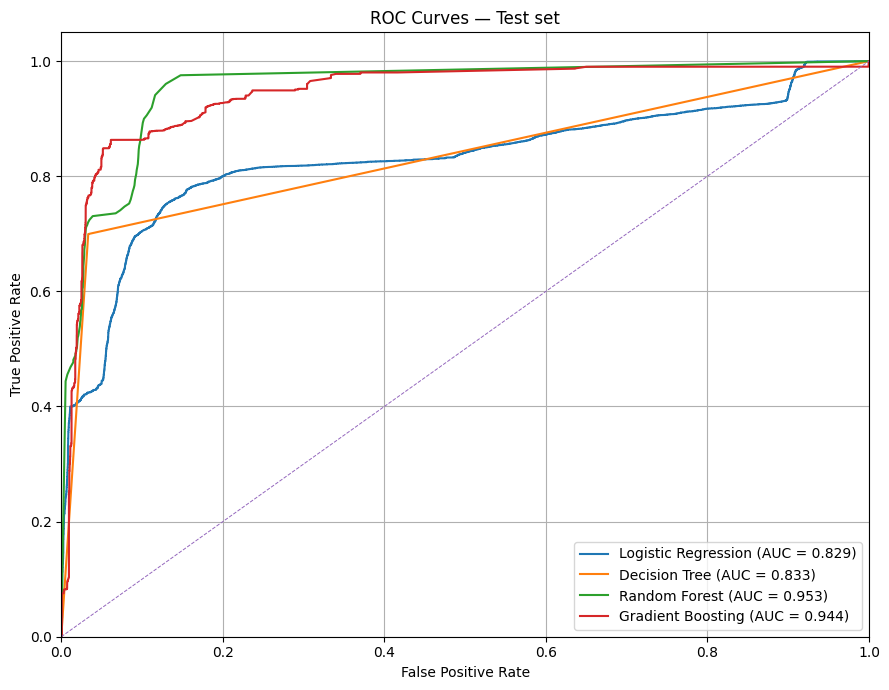

Logistic Regression AUC = 0.8290
Decision Tree AUC = 0.8331
Random Forest AUC = 0.9534
Gradient Boosting AUC = 0.9439


In [15]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

plt.figure(figsize=(9,7))
for name, model in models.items():
    # get score for positive class
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_score = model.decision_function(X_test)
    else:
        # fallback — not ideal for ROC but keeps code safe:
        y_score = model.predict(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_score)
    model_auc = auc(fpr, tpr)  # numeric AUC
    plt.plot(fpr, tpr, label=f"{name} (AUC = {model_auc:.3f})")

# chance line
plt.plot([0, 1], [0, 1], linestyle='--', linewidth=0.7)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves — Test set")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# numeric AUC summary
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        score = model.predict_proba(X_test)[:,1]
    elif hasattr(model, "decision_function"):
        score = model.decision_function(X_test)
    else:
        score = model.predict(X_test)
    print(f"{name} AUC = {roc_auc_score(y_test, score):.4f}")
